In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [5]:
data = pd.read_excel("dataset.xlsx", sheet_name='bus_statistics')

In [7]:
data['arriving_time'] = pd.to_datetime(data.arriving_time, format = '%H:%M:%S')

In [9]:
data51 = data[data['bus_number'].isin([51])]
data51 = data51.reset_index()

data31 = data[data['bus_number'].isin([31])]
data31 = data31.reset_index()

data27 = data[data['bus_number'].isin([27])]
data27 = data27.reset_index()


In [10]:
data.groupby('bus_number').agg(['sum','mean'])['amount_of_people']

C:\Users\USER\AppData\Local\Temp\ipykernel_19244\160888067.py:1: FutureWarning: ['arriving_time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('bus_number').agg(['sum','mean'])['amount_of_people']


,sum,mean
bus_number,,
27,130,10.0
31,224,14.0
51,135,15.0


In [11]:
data['amount_of_people'].sum()

489

In [12]:
round(data['amount_of_people'].mean())

13

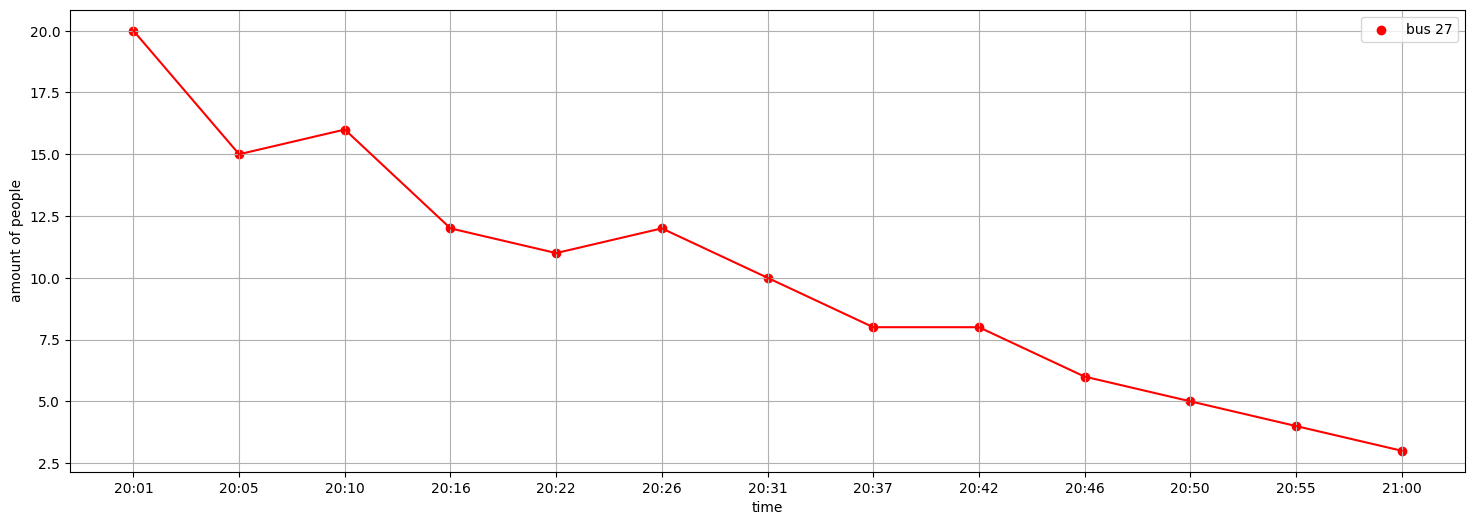

In [14]:
plt.figure(figsize= (18, 6))
plt.grid(True)
plt.xlabel('time')
plt.ylabel('amount of people')
plt.scatter(data[data['bus_number'].isin([27])].arriving_time.dt.strftime("%H:%M"), data[data['bus_number'].isin([27])].amount_of_people, c = 'red', label = 'bus 27')
plt.plot(data[data['bus_number'].isin([27])].arriving_time.dt.strftime("%H:%M"), data[data['bus_number'].isin([27])].amount_of_people, c = 'red')
plt.legend(loc = 'upper right')


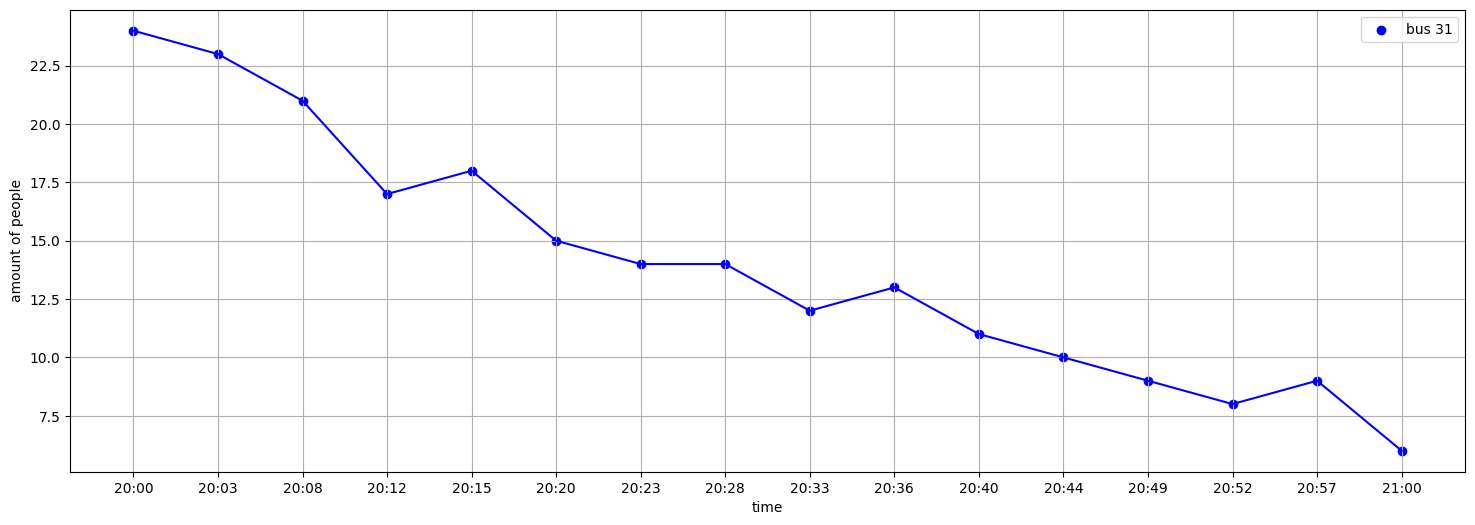

In [15]:
plt.figure(figsize= (18, 6))
plt.grid(True)
plt.xlabel('time')
plt.ylabel('amount of people')
plt.scatter(data[data['bus_number'].isin([31])].arriving_time.dt.strftime("%H:%M"), data[data['bus_number'].isin([31])].amount_of_people, c = 'blue', label = 'bus 31')
plt.plot(data[data['bus_number'].isin([31])].arriving_time.dt.strftime("%H:%M"), data[data['bus_number'].isin([31])].amount_of_people, c = 'blue')
plt.legend(loc = 'upper right')

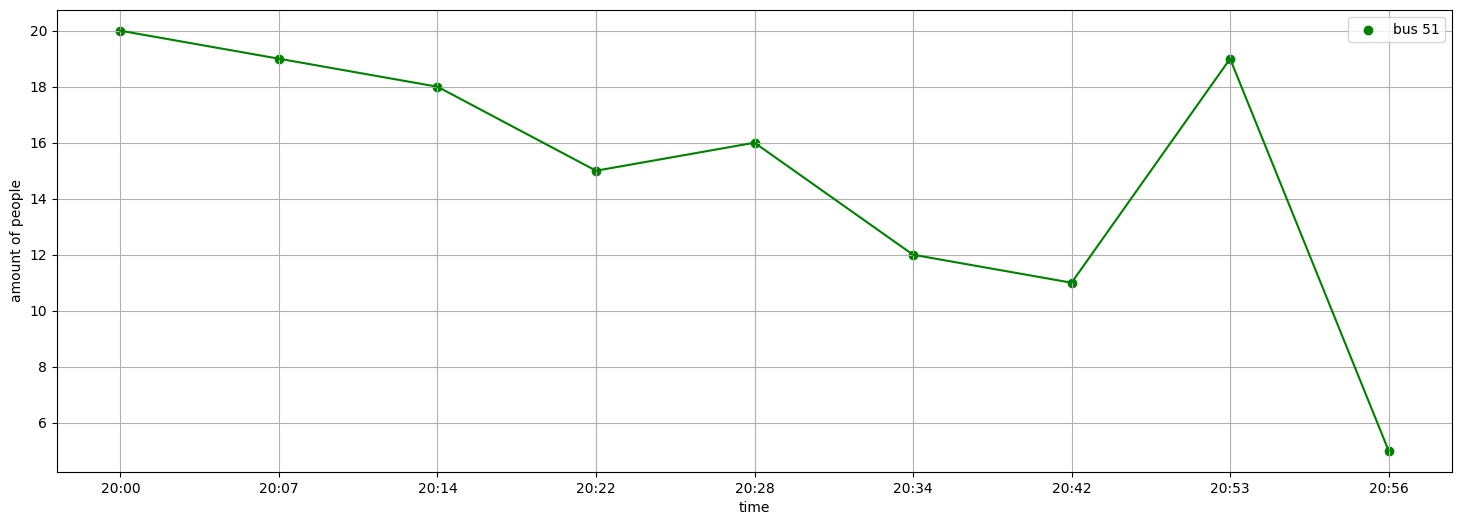

In [16]:
plt.figure(figsize= (18, 6))
plt.grid(True)
plt.xlabel('time')
plt.ylabel('amount of people')
plt.scatter(data[data['bus_number'].isin([51])].arriving_time.dt.strftime("%H:%M"), data[data['bus_number'].isin([51])].amount_of_people, c = 'green', label = 'bus 51')
plt.plot(data[data['bus_number'].isin([51])].arriving_time.dt.strftime("%H:%M"), data[data['bus_number'].isin([51])].amount_of_people, c = 'green')
plt.legend(loc = 'upper right')

In [17]:
def awaiting_time(data):
    i = (len(data)-1)
    awaiting_time = []
    while (i > 0 ):
        awaiting_time.append(data.arriving_time[i] - data.arriving_time[i-1])
        i -= 1
    awaiting_time.append(data.arriving_time[0] - data.arriving_time[0])
    return awaiting_time


In [18]:
def avarage_awaiting_time(data):
    time = []
    i = 0
    temp1 = []
    temp = awaiting_time(data)
    temp1.append(temp[0])
    while(i < len(temp)-1):
        temp1[0] += temp[i+1]
        i += 1
    time.append(temp1[0]/(len(temp)-1))
    return time
    

In [19]:
avarage_awaiting_time(data51)

[Timedelta('0 days 00:07:00')]

In [20]:
avarage_awaiting_time(data27)

[Timedelta('0 days 00:04:55')]

In [21]:
avarage_awaiting_time(data31)

[Timedelta('0 days 00:04:00')]

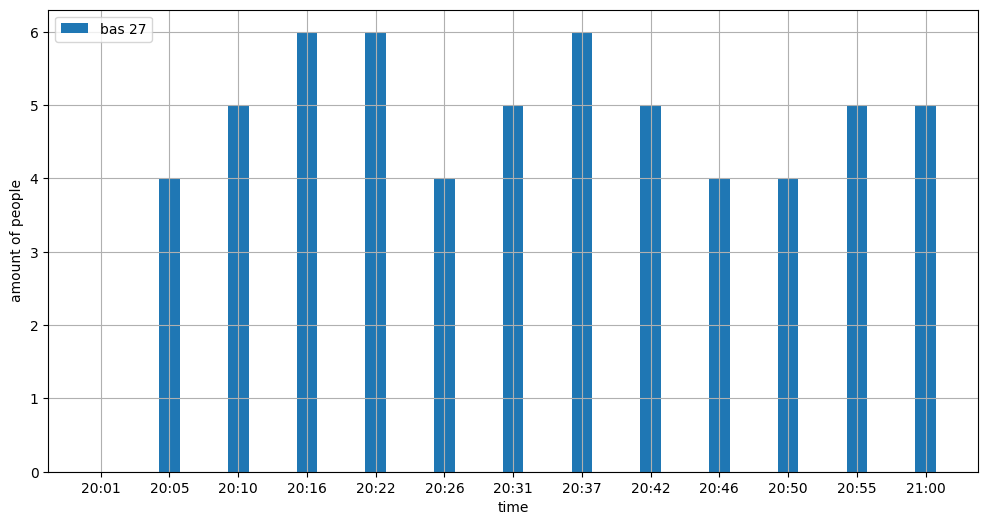

In [38]:
plt.figure(figsize= (12, 6))
plt.grid(True)
plt.xlabel('time')
plt.ylabel('amount of people')
plt.bar(data27.arriving_time.dt.strftime("%H:%M"), data27.awaiting_time, width = 0.3, label = 'bas 27')
plt.legend(loc = 'upper left')

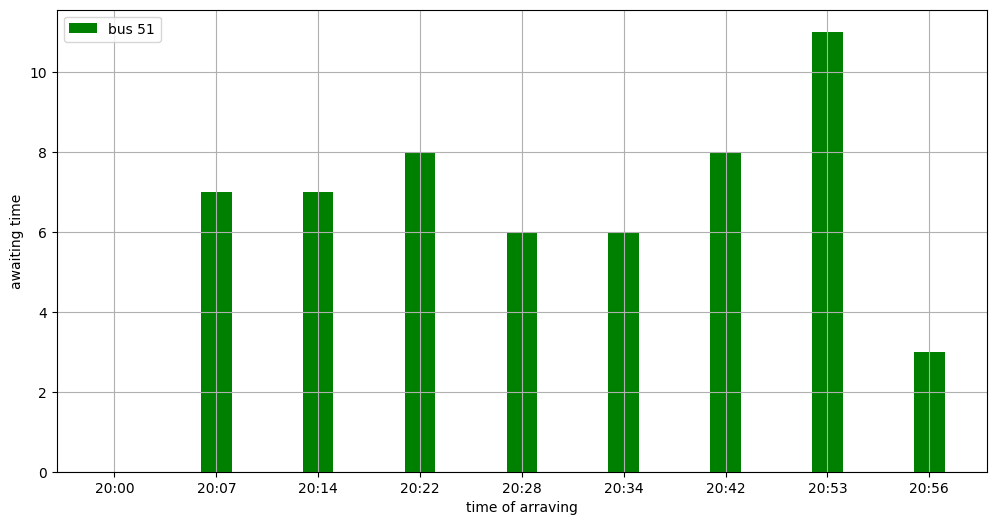

In [39]:
plt.figure(figsize= (12, 6))
plt.grid(True)
plt.xlabel('time of arraving')
plt.ylabel('awaiting time')
plt.bar(data51.arriving_time.dt.strftime("%H:%M"), data51.awaiting_time, label = 'bus 51', width = 0.3, color = 'green')
plt.legend(loc = 'upper left')

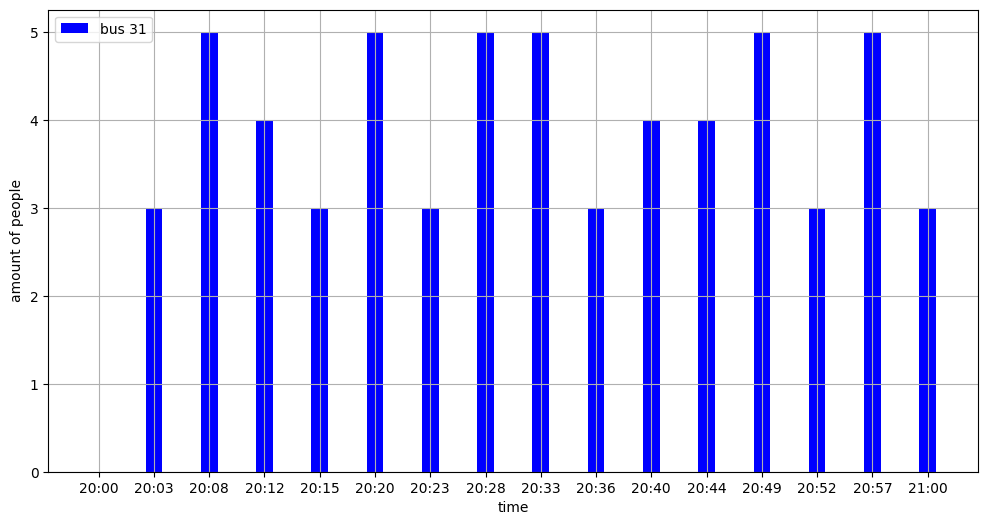

In [40]:
plt.figure(figsize= (12, 6))
plt.grid(True)
plt.xlabel('time')
plt.ylabel('amount of people')
plt.bar(data31.arriving_time.dt.strftime("%H:%M"), data31.awaiting_time, width = 0.3, label = 'bus 31', color = 'blue')
plt.legend(loc = 'upper left')

In [41]:
tempo = awaiting_time(data51)
tempo.reverse()
data51['awaiting_time'] = tempo

In [42]:
tempo = awaiting_time(data31)
tempo.reverse()
data31['awaiting_time'] = tempo

In [43]:
tempo = awaiting_time(data27)
tempo.reverse()
data27['awaiting_time'] = tempo

In [44]:
data51['awaiting_time'] = data51['awaiting_time'] / pd.Timedelta(minutes=1)
data31['awaiting_time'] = data31['awaiting_time'] / pd.Timedelta(minutes=1)
data27['awaiting_time'] = data27['awaiting_time'] / pd.Timedelta(minutes=1)

In [47]:
def awaiting_time(data):
    i = (len(data)-1)
    awaiting_time = []
    while (i > 0 ):
        awaiting_time.append(data.arriving_time[i] - data.arriving_time[i-1])
        i -= 1
    awaiting_time.append(data.arriving_time[0] - data.arriving_time[0])
    return awaiting_time

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bus_number        38 non-null     int64         
 1   arriving_time     38 non-null     datetime64[ns]
 2   amount_of_people  38 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.0 KB
